<a href="https://colab.research.google.com/github/Rahul711sharma/AirBnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

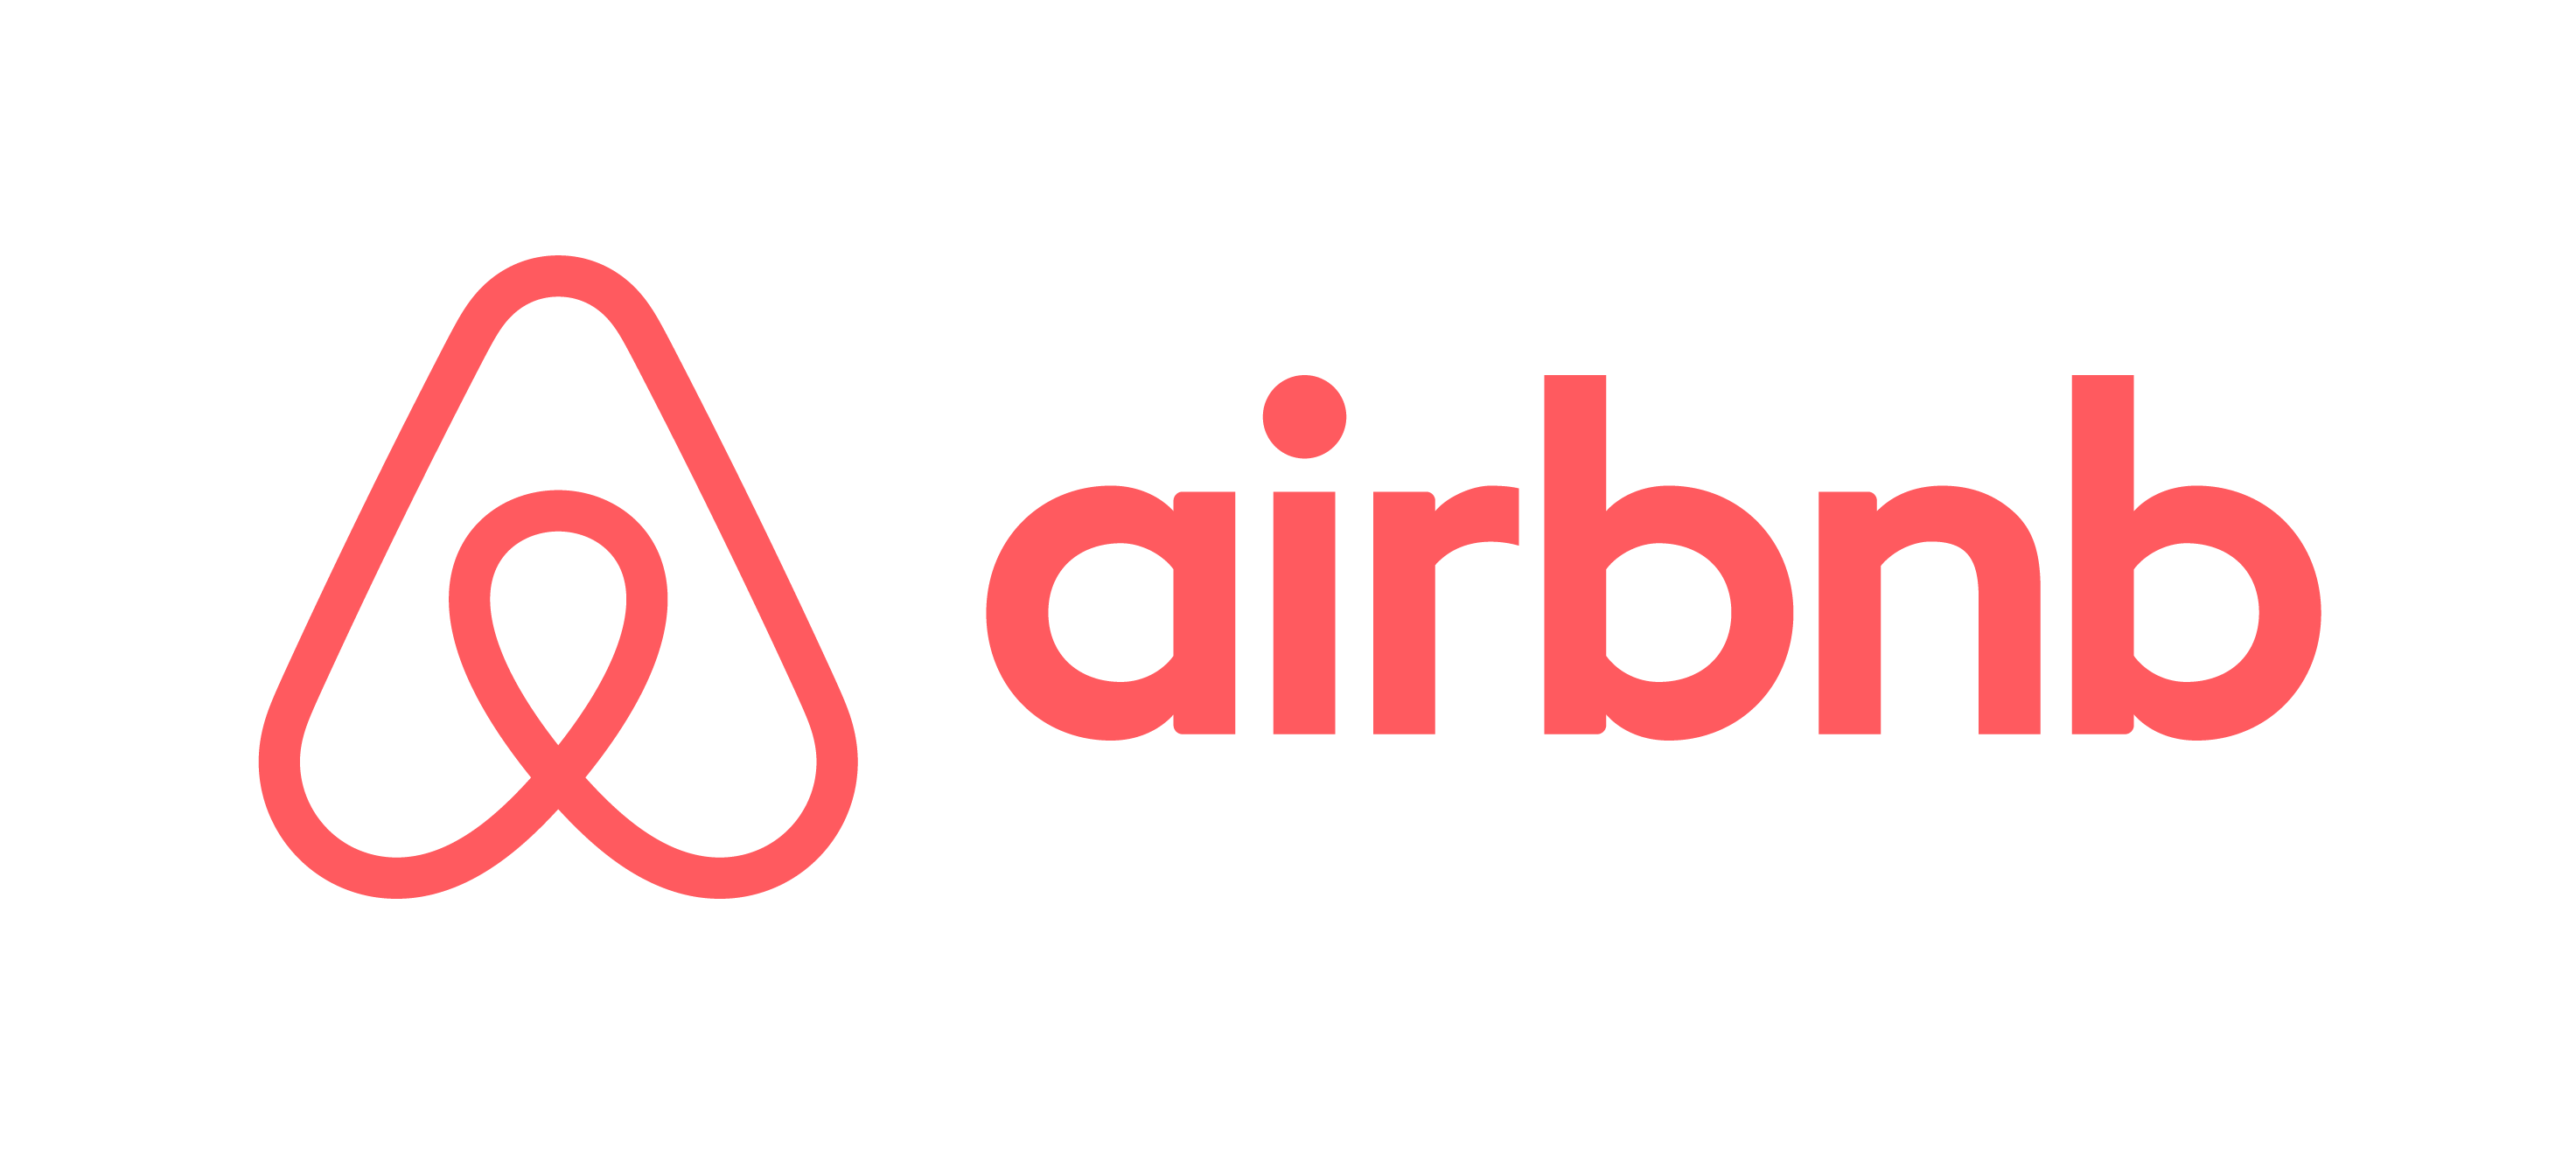

In [ ]:
pip install geoplot

     |████████████████████████████████| 1.0MB 26.3MB/s 
     |████████████████████████████████| 12.1MB 34.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.5MB 31.7MB/s 
     |████████████████████████████████| 15.3MB 193kB/s 
     |████████████████████████████████| 19.1MB 1.4MB/s 
     |████████████████████████████████| 225kB 53.1MB/s 
     |████████████████████████████████| 92kB 9.5MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516164 sha256=a0a135f0d40865b0e99a951904d3a182b9dce6eaf643181fb6483a0a5a5ae72f
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=61bb04536030c96ea80302909b2ed92b914b2d226ec9e0d28fd0dbf99560076e
  Stored in directory: /roo

installing library to plot maps for latitude and longitude variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import polygon,point
from plotnine import *
from shapely.geometry import Point 
from itertools import cycle, islice
import geopandas as gpd
import geoplot
%matplotlib inline

In [ ]:
df = pd.read_csv("https://github.com/Rahul711sharma/AirBnb-Booking-Analysis/raw/main/Airbnb%20NYC%202019.csv")

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

##Pre-Processing Data


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.isna().sum()/len(df)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64



--- The columns like ``last_review`` and ``reviews_per_month`` contains more than 20% of null values which needs to treated. 




--- For project the few columns are irrelevant such as ``name`` ``host_name`` and ``last_review`` 




--- For the column ``reviews_per_month`` we can impute the null values with 0



In [ ]:
#checking for any duplicate values in the dataset
df.duplicated().sum()

0

In [ ]:
df.drop(['id','name','last_review'],axis = 1, inplace = True)

In [ ]:
df.shape

(48895, 13)

In [ ]:
# impute the null values as 0

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
df.isnull().mean()*100

host_id                           0.000000
host_name                         0.042949
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

##EDA



In [ ]:
# calculating total number of rooms for different room types

room_type_df = pd.DataFrame(df['room_type'].value_counts()).reset_index().rename(columns = {"index":'room_type', 'room_type':'Total_listed_rooms'})

room_type_df

,room_type,Total_listed_rooms
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


<Figure size 720x360 with 0 Axes>

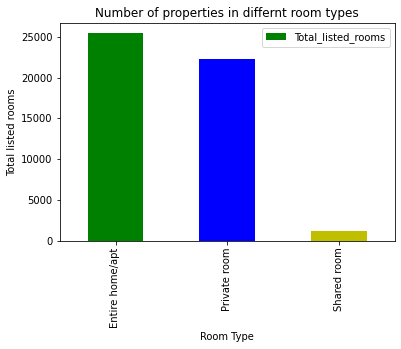

In [ ]:
plt.figure(figsize=(10, 5))
my_colors = list(islice(cycle(['g', 'b', 'y']), None, len(room_type_df)))
room_type_df.plot.bar(x = 'room_type', y = 'Total_listed_rooms', color=my_colors)

plt.xlabel("Room Type")
plt.ylabel("Total listed rooms")
plt.title("Number of properties in differnt room types")
plt.show()

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
neighbourhood_group_df = pd.DataFrame(df['neighbourhood_group'].value_counts()).reset_index().rename(columns = {'index' : 'neighbourhood_group', 'neighbourhood_group':'Total_rooms_listed'})
neighbourhood_group_df

,neighbourhood_group,Total_rooms_listed
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


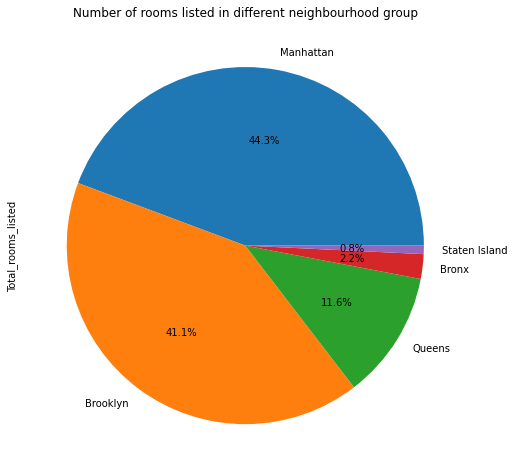

In [ ]:
neighbourhood_group_df.plot.pie(y = 'Total_rooms_listed', autopct='%1.1f%%',labels= neighbourhood_group_df['neighbourhood_group'] ,legend = False,figsize=(8, 10))
plt.title("Number of rooms listed in different neighbourhood group")
plt.show()

**From the above pie chart the following instances we can conclude**

*   ``Manhattan`` and ``brooklyn`` have most number of rooms, together have more than 85% of total rooms available
*   ``manhattan`` has highest number of rooms which is more than 44%



Stored the list of top 10 host in a separate dataframe ``top_10_host`` . This dataFrame contains top 10  list of ``host_id`` and total number of properties by that host listed on . 

In [ ]:

top_10_host = pd.DataFrame(df['host_id'].value_counts()).reset_index().rename(columns = {'index':"host_id", 'host_id':'Number of listed apt'}).head(10)

In [ ]:
top_10_host


,host_id,Number of listed apt
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


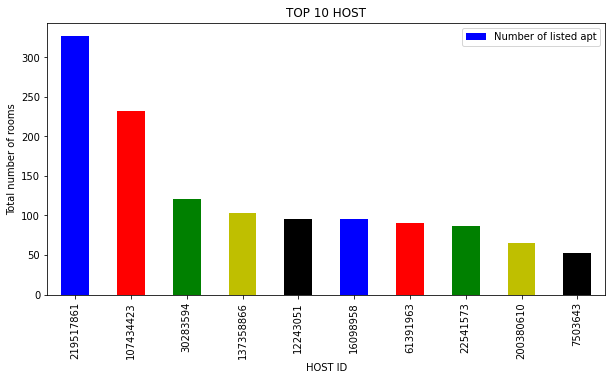

In [ ]:
#top 10 host Graph

my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(top_10_host)))
top_10_host.plot.bar(x ='host_id', y = 'Number of listed apt', color =my_colors, figsize = (10,5))
plt.xlabel("HOST ID")
plt.ylabel("Total number of rooms")
plt.title("TOP 10 HOST")
plt.show()

Top host in different ``neighbourhood_group``
 

In [ ]:
Brooklyn_df = df[df['neighbourhood_group'] == 'Brooklyn' ]

In [ ]:
Brooklyn_top_host = pd.DataFrame(Brooklyn_df['host_id'].value_counts()).reset_index().rename(columns = {"index":"host_id","host_id":"Total_rooms"}).head(10)
Brooklyn_top_host

,host_id,Total_rooms
0,7503643,52
1,26377263,35
2,119669058,34
3,417504,28
4,226410657,27
5,230192510,25
6,213781715,23
7,16437254,21
8,9864136,19
9,159091490,17


In [ ]:
Manhattan_df = df[df['neighbourhood_group'] == 'Manhattan' ]
Manhattan_df.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
Manhattan_top_host = pd.DataFrame(Manhattan_df['host_id'].value_counts()).reset_index().rename(columns = {"index":"host_id","host_id":"Total_rooms"}).head(10)
Manhattan_top_host

,host_id,Total_rooms
0,219517861,327
1,107434423,230
2,30283594,121
3,16098958,96
4,12243051,96
5,61391963,91
6,22541573,86
7,200380610,65
8,1475015,52
9,120762452,50


In [ ]:
Queens_df = df[df['neighbourhood_group'] == 'Queens' ]
Queens_top_host = pd.DataFrame(Queens_df['host_id'].value_counts()).reset_index().rename(columns = {"index":"host_id","host_id":"Total_rooms"}).head(10)
Queens_top_host

,host_id,Total_rooms
0,137358866,79
1,19303369,29
2,242962235,23
3,134184451,18
4,3250450,16
5,200239515,15
6,5962328,15
7,175730239,12
8,65809485,12
9,120767920,10


In [ ]:
Staten_Island_df = df[df['neighbourhood_group'] == 'Staten Island' ]
Staten_Island_top_host = pd.DataFrame(Staten_Island_df['host_id'].value_counts()).reset_index().rename(columns = {"index":"host_id","host_id":"Total_rooms"}).head(10)
Staten_Island_top_host

,host_id,Total_rooms
0,104812805,8
1,104927746,7
2,50756378,7
3,137999892,7
4,117492425,6
5,303939,6
6,99202586,5
7,92493393,5
8,1360198,4
9,43392243,4


In [ ]:
Bronx_df = df[df['neighbourhood_group'] == 'Bronx' ]
Bronx_top_host = pd.DataFrame(Bronx_df['host_id'].value_counts()).reset_index().rename(columns = {"index":"host_id","host_id":"Total_rooms"}).head(10)
Bronx_top_host

,host_id,Total_rooms
0,310670,13
1,23878336,10
2,35783912,8
3,30509656,8
4,174785358,7
5,295128,7
6,273354185,7
7,2988712,7
8,32164030,6
9,211136294,5


Room types and their average prices in different neighbourhood group

In [ ]:
df.groupby(['room_type','neighbourhood_group'])['price'].mean()

room_type        neighbourhood_group
Entire home/apt  Bronx                  127.506596
                 Brooklyn               178.327545
                 Manhattan              249.239109
                 Queens                 147.050573
                 Staten Island          173.846591
Private room     Bronx                   66.788344
                 Brooklyn                76.500099
                 Manhattan              116.776622
                 Queens                  71.762456
                 Staten Island           62.292553
Shared room      Bronx                   59.800000
                 Brooklyn                50.527845
                 Manhattan               88.977083
                 Queens                  69.020202
                 Staten Island           57.444444
Name: price, dtype: float64

Text(0.5, 1.0, 'Room_type and Prices throughout the neighbourhood_group\n')

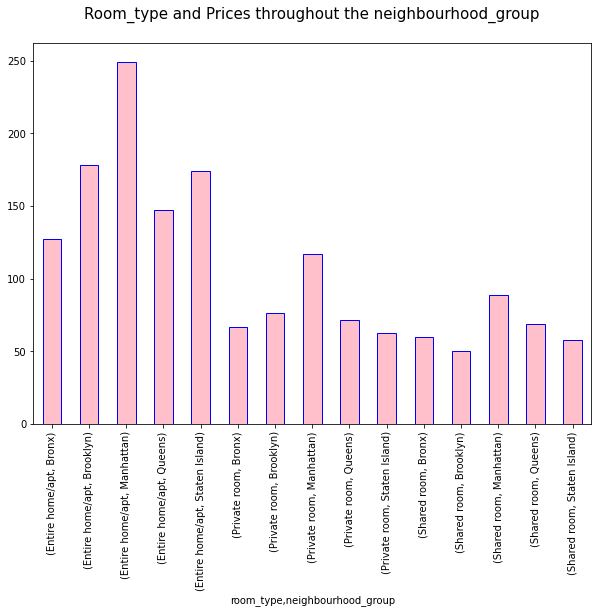

In [ ]:
plt.figure(figsize=(10,7))
df.groupby(['room_type','neighbourhood_group'])['price'].mean().plot(kind='bar',color='pink',edgecolor='blue',)
plt.title('Room_type and Prices throughout the neighbourhood_group\n',fontdict={'fontsize':15})

**From the above plot we can say**

*   The average price of Entire room/apt in manhattan is higher than any other in neighbourhood
*   The average price of shared room in manhatten is is higher than any other neighbourhoods 


*   The average price of shared room in manhattan is higher than any other neighbourhood

**From the above insights we can conclude that the manhattan is a expensive place to rent property in any category**





types of rooms avail in different ``neighbourhood_group``


In [ ]:
pd.pivot_table(df[['room_type']],index=df['neighbourhood_group'],columns=df['room_type'],aggfunc='count')

room_type                         
room_type           Entire home/apt Private room Shared room
neighbourhood_group                                         
Bronx                           379          652          60
Brooklyn                       9559        10132         413
Manhattan                     13199         7982         480
Queens                         2096         3372         198
Staten Island                   176          188           9

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


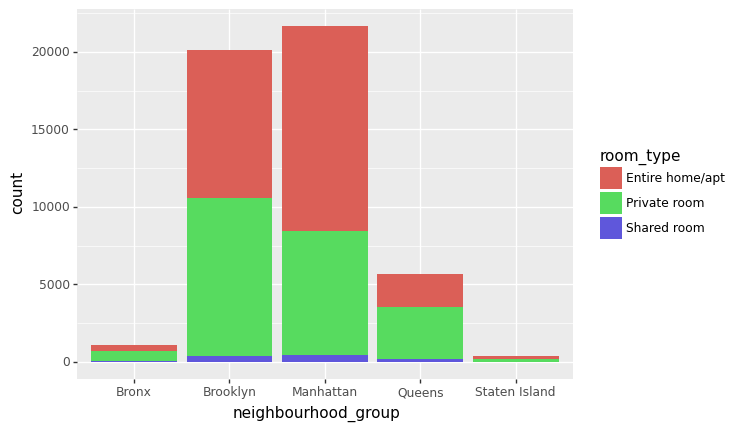

<ggplot: (8745993958821)>

In [ ]:
ggplot(df)+aes('neighbourhood_group',fill='room_type')+geom_bar()

###Geometric plots for insights

In [ ]:
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
geo_df=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df["longitude"], df["latitude"]))

In [ ]:
geo_df.head(3)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,POINT (-73.97237 40.64749)
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,POINT (-73.98377 40.75362)
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,POINT (-73.94190 40.80902)


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


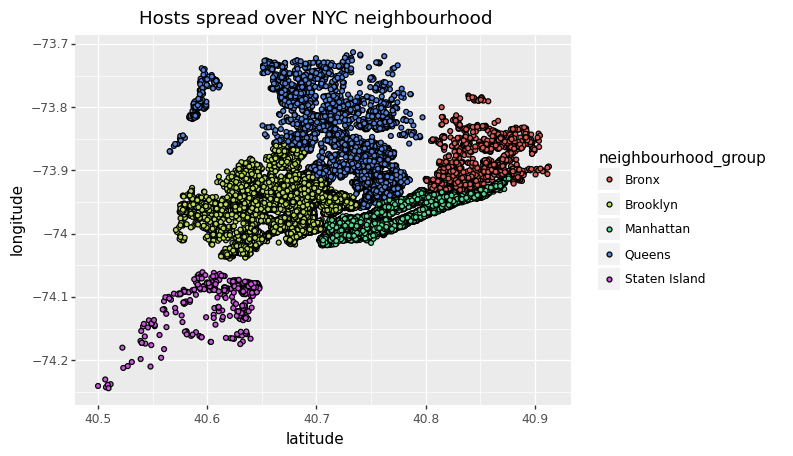

<ggplot: (8745994392025)>

In [ ]:
ggplot(df)+aes('latitude','longitude',fill='neighbourhood_group') + geom_point()+ggtitle("Hosts spread over NYC neighbourhood")

In [ ]:
pd.options.display.max_rows=200

In [ ]:
# analysis of minimum nights

print(f"Quantiles : {list(np.quantile(df['minimum_nights'],[.25,.5,.75]))}")
print(f"range : {(np.max(df['minimum_nights'])-(np.min(df['minimum_nights'])))}")
print(f"\nStay for more than 50,20,10 days :{len(df['minimum_nights'][df['minimum_nights']>50])}, {len(df['minimum_nights'][df['minimum_nights']>20])}, {len(df['minimum_nights'][df['minimum_nights']>10])}")

print(f"\nStay for less than 10 days :{len(df['minimum_nights'][df['minimum_nights']<50])}")


Quantiles : [1.0, 3.0, 5.0]
range : 1249

Stay for more than 50,20,10 days :453, 5330, 6640

Stay for less than 10 days :48428


No handles with labels found to put in legend.


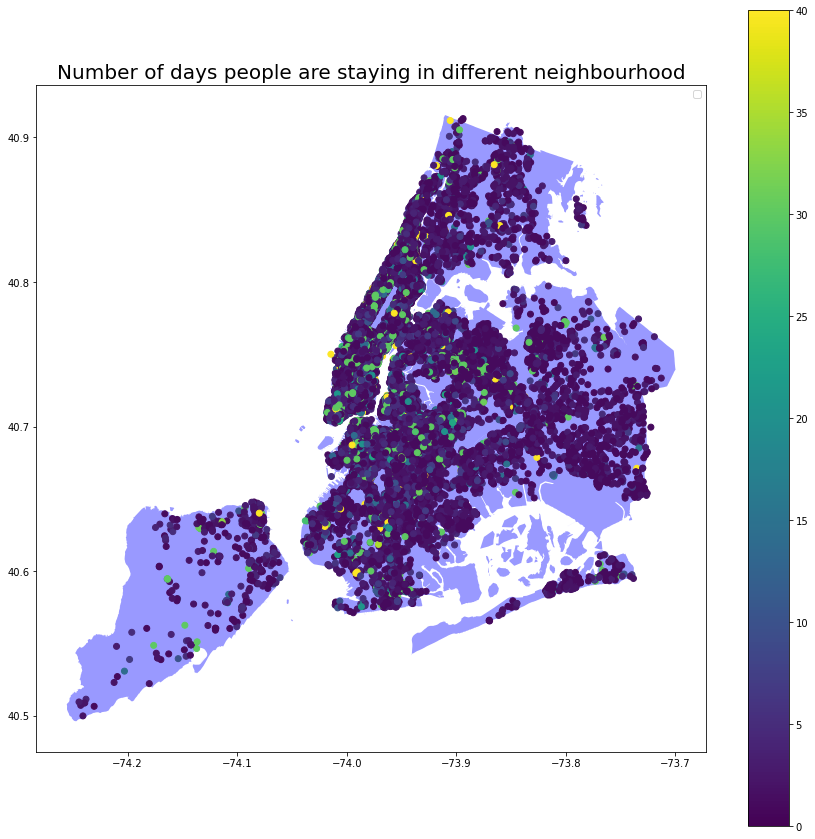

In [ ]:
fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="blue")
x, y = geo_df['longitude'].values, geo_df['latitude'].values
plt.scatter(x,y,c=geo_df['minimum_nights'])
plt.clim(0,40)
plt.title("Number of days people are staying in different neighbourhood",fontdict={'fontsize':20})
plt.colorbar()
plt.legend()

1. From stats above presented, we understand that there's high range in the data. people staying for more than 10 days is fewer.
2. Geograph was intended to show pattern if there were any in case people prefering any location to stay for more days.
italicized text

No handles with labels found to put in legend.


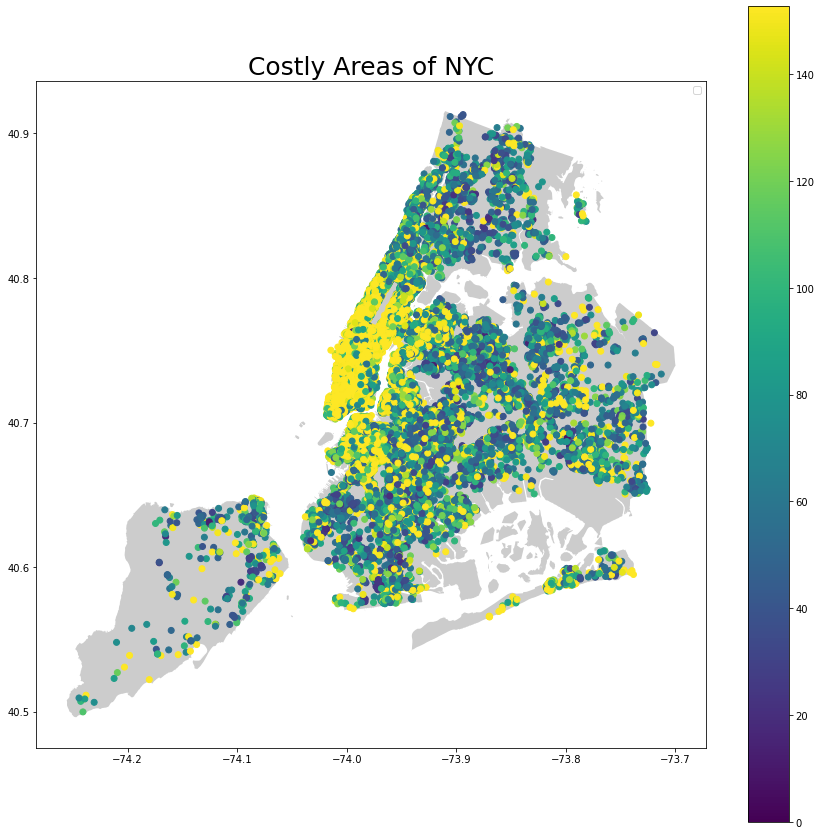

In [ ]:
fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
x, y = geo_df['longitude'].values, geo_df['latitude'].values
plt.scatter(x,y,c=geo_df['price'])
plt.clim(0,np.mean(df['price']))
plt.title("Costly Areas of NYC",fontdict={'fontsize':25})
plt.colorbar()
plt.legend()



1.   Yellow dots represents the places where the properties are costly
2.   blue dots reprensts the places where the properties are comparatively cheaper
**The place where we can see high concentration of yellow dots is the most costly region in NYC**



No handles with labels found to put in legend.


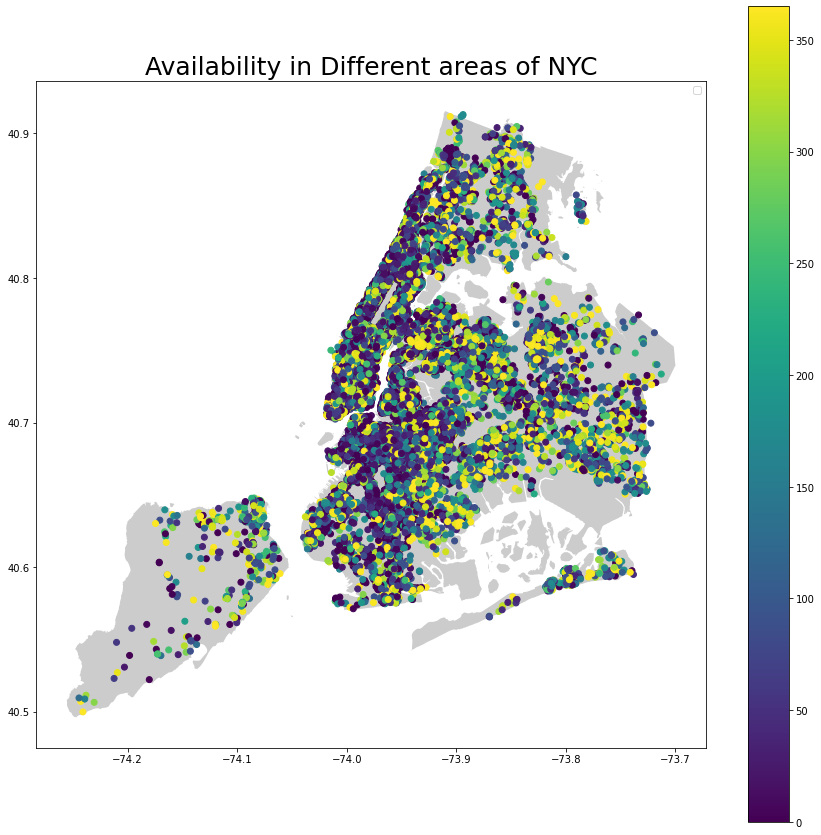

In [ ]:
fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
x, y = geo_df['longitude'].values, geo_df['latitude'].values
plt.scatter(x,y,c=geo_df['availability_365'])
plt.clim(0,np.max(geo_df['availability_365']))
plt.title('Availability in Different areas of NYC',fontdict={'fontsize':25})
plt.colorbar()
plt.legend()

1. When we compare two graphs we can say that most costly places are also a cluster of considerable number of rooms availabilities as well. 

**The empty spots on the maps can be considered the opportunities to expand and enroll new hosts from there.**


## **Conclusion**

In  the data analysis project, I analyzed some of the most popular trends given the Airbnb's data on listings in NYC

Summarizing findings:-

*   **Manhattan** and **Brooklyn** are the prime locations with highest number of rooms.

*   **Manhattan** is the most expensive place to live.

*   In **Manhattan** people perfer to rent entire home and apartment.

*   **Staten island** is the least popular place amoung them.

*   Most properties have price in the range **0-150**

*   **Prices** very wildly based on property and room types.

*  Majority of Hosts listed their entire home property 

*   People prefer to list there properties for minimun number of nights **less than a week** .

*   The properties which are **expensive** tend to attract **less reviews**, which means people less likely to rent expensive rooms













